In [1]:
import pandas as pd
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
master=schedule.append(cancelled)
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

master.info()
master.to_csv('Merged_Enrollment1.csv')
pd.set_option("display.max_columns",100)   # Display all columns so you can see the DataFrame better.
master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 3231
Data columns (total 26 columns):
Course                   3363 non-null object
Course Prefix            6131 non-null object
Course Suffix            6131 non-null object
Department               3363 non-null object
First Begin Time         5629 non-null object
First Days               5553 non-null object
First End Time           5629 non-null object
First Instructor         5664 non-null object
First Instructor UID     5645 non-null float64
First Room               5696 non-null object
Link                     936 non-null object
Max Units                6131 non-null float64
Min Units                6131 non-null float64
Mode                     6131 non-null object
Reg Count                6131 non-null int64
Seats                    6131 non-null int64
Second Begin Time        43 non-null object
Second Days              43 non-null object
Second End Time          43 non-null object
Second Instructor        

,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,Link,Max Units,Min Units,Mode,Reg Count,Seats,Second Begin Time,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title
0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,NaN,0.0,0.0,L,106,135,NaN,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues
1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,24,42,NaN,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues
2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,NaN,4.0,4.0,C,40,42,NaN,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues
3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,42,42,NaN,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues
4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,NaN,0.0,0.0,D,110,150,NaN,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems


In [4]:
#computing the utilization for individual class
master['capacity utilization rate'] = master['Reg Count']/master['Seats']*100


# Plot the distribution of classroom utilizatoin

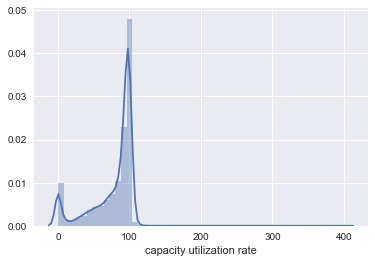

In [5]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.distplot(master['capacity utilization rate'])

# Plot the distribution of classroom seats

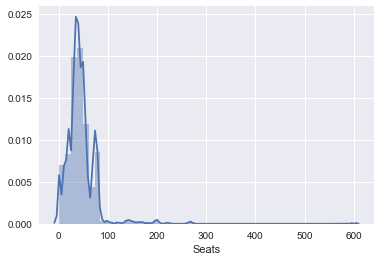

In [6]:
import seaborn as sns
import matplotlib as plt
y = master.loc[(master['capacity utilization rate'] <= 100) & (master['capacity utilization rate'] > 0) & (master['Seats'] < 250)]
y.describe()
%matplotlib inline
sns.distplot(master['Seats'])

# 90% is the reasonable goal, nothing should be less than 75% (first quartile) 

#master.loc[master['Seats'] > 100] 

# Remove incorrect values

In [11]:
master['capacity utilization rate'].value_counts()

import numpy as np
# we see that this data can be removed for analysis purposes 
#df = master[['capacity utilization rate']]
master['excess_students'] = master['Reg Count'] - master['Seats']
master.head()
master.loc[master['excess_students'] > 0].max() #only max of 6 more students, this is manageable? 
#so we set the threshold to 125% and filter out the rest of the cases 
master.loc[master['capacity utilization rate']>125].index #checking the indices of the dataset to filter 

# 


master_revised = master[(master['capacity utilization rate'] != 0) & (master['capacity utilization rate'] <= 100)] 

master_revised.describe()

# do we want any more exclusion restrictions - maybe on the class size 





,First Instructor UID,Max Units,Min Units,Reg Count,Seats,Second Instructor UID,Section,Session,Term,capacity utilization rate,excess_students
count,5.340000e+03,5570.000000,5570.000000,5570.000000,5570.000000,5.590000e+02,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,5.847607e+09,2.899013,2.778905,40.473968,47.990844,5.819614e+09,18568.843986,154.972531,20162.421185,83.384274,-7.516876
std,2.607030e+09,1.855018,1.687174,28.452449,32.081057,2.554957e+09,12038.432813,256.230698,6.376862,21.634412,13.072425
min,1.037008e+09,0.000000,0.000000,1.000000,1.000000,1.112011e+09,901.000000,1.000000,20153.000000,2.000000,-221.000000
25%,3.550296e+09,2.000000,2.000000,25.000000,32.000000,4.153760e+09,14662.000000,1.000000,20161.000000,75.000000,-10.000000
50%,6.174146e+09,3.000000,3.000000,36.000000,42.000000,6.109972e+09,15177.000000,1.000000,20163.000000,93.750000,-3.000000
75%,8.098676e+09,4.000000,4.000000,48.000000,54.750000,7.982048e+09,16276.000000,372.000000,20171.000000,98.701299,-1.000000
max,9.994127e+09,18.000000,15.000000,507.000000,600.000000,9.981846e+09,66793.000000,943.000000,20172.000000,100.000000,0.000000


# Calculate the current value of our metric from cleaned data
The median of capacity utilization rate is shown in the table. It has value of 93.75%

# Investigating Overloaded Classes

In [19]:
master_overload200 = master[master['capacity utilization rate'] > 100] 

master_overload200.describe()

,First Instructor UID,Max Units,Min Units,Reg Count,Seats,Second Instructor UID,Section,Session,Term,capacity utilization rate,excess_students
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,2.100000e+01,97.000000,97.000000,97.000000,97.000000,97.000000
mean,4.959933e+09,2.932990,2.932990,39.659794,37.721649,5.341985e+09,19458.948454,41.350515,20165.123711,109.627101,1.938144
std,2.469530e+09,1.133369,1.133369,19.879264,19.709210,1.614137e+09,14445.790495,108.523523,5.498594,30.596951,1.329273
min,1.037008e+09,0.000000,0.000000,3.000000,1.000000,1.275178e+09,14026.000000,1.000000,20153.000000,101.250000,1.000000
25%,2.447845e+09,3.000000,3.000000,31.000000,30.000000,4.755449e+09,14237.000000,1.000000,20161.000000,102.777778,1.000000
50%,5.321617e+09,3.000000,3.000000,34.000000,32.000000,5.321617e+09,14847.000000,1.000000,20163.000000,105.000000,1.000000
75%,6.969639e+09,4.000000,4.000000,48.000000,47.000000,6.969639e+09,15181.000000,1.000000,20171.000000,109.375000,3.000000
max,9.394817e+09,4.000000,4.000000,95.000000,90.000000,6.969639e+09,66791.000000,411.000000,20172.000000,400.000000,6.000000


# Find some possible oppurtunies of improvement

In [ ]:
#finding classes with critically low utilizations
low = master[(master['capacity utilization rate'] != 0) & (master['capacity utilization rate'] <50)]

In [13]:
# finding overloaded classes
high = master[(master['capacity utilization rate'] != 0) & (master['capacity utilization rate'] >= 100)]

In [17]:
high.to_csv('high.csv')

In [9]:
master_revised.to_csv('revised.csv')